In [ ]:
from picamera import PiCamera
from picamera.array import PiRGBArray
import skimage as ski
from matplotlib import pyplot as plt
from scipy.signal import filtfilt, butter, find_peaks
from pwm import PWM
import sys
from time import sleep

b, a = butter(3, 0.02)

res = (1024, 768)
camera = PiCamera()
camera.sensor_mode = 7
camera.resolution = res
camera.framerate = 120

try:
    rawCapture = PiRGBArray(camera, size=res)
    stream = camera.capture_continuous(rawCapture, format="rgb", use_video_port=True)
    while 1:
except Exception as e:
    stream.close()
    rawCapture.close()
    camera.close()
with PiCamera() as camera:
    with PiRGBArray(camera) as output:
        for i in range(100):
            camera.capture(output, 'rgb')
            print("Captured image: ", output.array.shape)
            I = ski.color.rgb2gray(output.array)
            output.truncate(0)
            
            mid_horizontal = int(I.shape[0]/2)
            mid_vertical = int(I.shape[1]/2)

            L = I[mid_horizontal, :]
            Lf = filtfilt(b, a, L)
            p = find_peaks(Lf, 0.5)

            closest_peak_at = -1
            distance_peak = 10000
            for peak in p[0]:
                if abs(mid - peak) < distance_peak:
                    closest_peak_at = peak
                    distance_peak = abs(mid - peak)
            deviation = ((mid - closest_peak_at)*1.0)/mid
            threshold_deviation = 0.2
            if deviation < -1*threshold_deviation:
                print("go right")
            elif -1*threshold_deviation <= deviation <= threshold_deviation:
                print("go straight")
            else:
                print("go left")
                


maxSpeed = 20000000 # top speed
minSpeed =  1000000 # 0 speed
zeroRot  =  1000000
maxRot   =   500000

speed = minSpeed
rot = zeroRot 

pwm0 = PWM(0) # motor
pwm0.export()
pwm0.period = 20000000

pwm1 = PWM(1)
pwm1.export() # servo
pwm1.period = 20000000
pwm1.duty_cycle = zeroRot 

pwm0.enable = True
pwm1.enable = True

print("waiting for moter")
sleep(10)
print("motor ready")

pwm0.duty_cycle = 1.05 * minSpeed

with PiCamera() as camera:
    with PiRGBArray(camera) as output:
    move = None
    while 1
        camera.capture(output, 'rgb')
        I = ski.color.rgb2gray(output.array)
        output.truncate(0)

        mid_horizontal = int(I.shape[0]/2)
        mid_vertical = int(I.shape[1]/2)

        L = I[mid_horizontal, :]
        Lf = filtfilt(b, a, L)
        p = find_peaks(Lf, 0.5)

        closest_peak_at = -1
        distance_peak = 10000
        for peak in p[0]:
            if abs(mid - peak) < distance_peak:
                closest_peak_at = peak
                distance_peak = abs(mid - peak)
        deviation = ((mid - closest_peak_at)*1.0)/mid
        threshold_deviation = 0.2
        if deviation < -1*threshold_deviation:
            print("go right")
            move = "right"
        elif -1*threshold_deviation <= deviation <= threshold_deviation:
            print("go straight")
            move = "straight"
        else:
            print("go left")
            move = "left"

        if move == 'right':
            rot = min(zeroRot + maxRot, rot+0.10*rot)
        elif move == 'left':
            rot = max(zeroRot -maxRot, rot-0.10*rot)
        else:
            rot = zeroRot
        print(speed, rot)
        pwm1.duty_cycle = int(rot)

In [2]:
from picamera import PiCamera
from picamera.array import PiRGBArray
import skimage as ski
from matplotlib import pyplot as plt
from scipy.signal import filtfilt, butter, find_peaks
import sys
from time import sleep

/home/pi/.virtualenvs/raceon/lib/python3.5/site-packages/picamera/encoders.py:544: PiCameraResolutionRounded: frame size rounded up from 720x480 to 736x480
  width, height, fwidth, fheight)))


Captured image:  (480, 720, 3)
(480, 720)


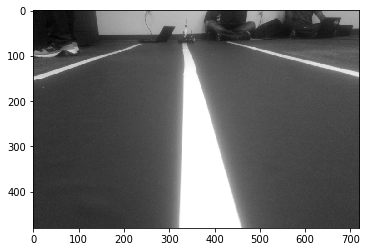

In [3]:
with PiCamera() as camera:
    with PiRGBArray(camera) as output:
        camera.capture(output, 'rgb')
        print("Captured image: ", output.array.shape)
        I = ski.color.rgb2gray(output.array)
        plt.imshow(I, cmap='gray')
        print(I.shape)

In [13]:
# NOTES:
# 1. PiCamera.array Have classes which help in constructing n-d np arrays from camera output.


In [26]:
I.shape

(480, 720)

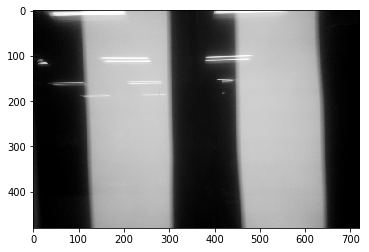

In [52]:
plt.imshow(I, cmap='gray')

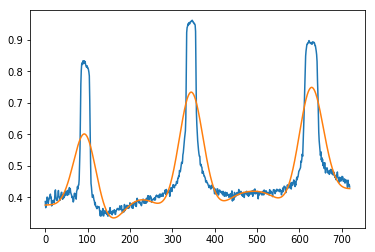

In [4]:
b, a = butter(3, 0.02)
L = I[120, :]
Lf = filtfilt(b, a, L)

plt.plot(L)
plt.plot(Lf)

(array([170, 249, 494, 577], dtype=int32), {'peak_heights': array([0.8122511 , 0.8433912 , 0.81519215, 0.78652977])})


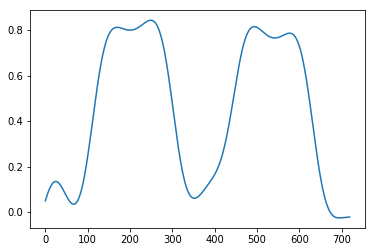

In [59]:
p = find_peaks(Lf, 0.5)
print(p)
plt.plot(Lf)


In [60]:
# get the peak closest to mid
I.shape

(480, 720)

In [62]:
mid = int(I.shape[1]/2)
print(mid)

360


In [66]:
closest_peak_at = -1
distance_peak = 10000
for peak in p[0]:
    if abs(mid - peak) < distance_peak:
        closest_peak_at = peak
        distance_peak = abs(mid - peak)

print(closest_peak_at)

249


In [69]:
# try to align yourself with closest peak
deviation = ((mid - closest_peak_at)*1.0)/mid
threshold_deviation = 0.2
if deviation < -1*threshold_deviation:
    print("go right")
elif -1*threshold_deviation <= deviation <= threshold_deviation:
    print("go straight")
else:
    print("go left")


go left
